In [2]:
pip install tensorflow-gpu

  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 36, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/tmp/pip-install-tneups3a/tensorflow-gpu_5920ba52141745cbbab1c58d48217cf5/setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/tensorflow-gpu
      
      
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  Runnin

In [3]:
!nvidia-smi

Thu Apr 20 04:35:38 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.161.03   Driver Version: 470.161.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  Tesla T4            Off  | 00000000:00:05.0 Off |                    0 |
| N/A   

In [4]:
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [50]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/kaggle/input/classification-data/food/train'
valid_path = '/kaggle/input/classification-data/food/test'

In [8]:
IMAGE_SIZE+[3]

[320, 320, 3]

In [6]:
#image size is 244,244,3
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87910968/87910968 [==============================] - 1s 0us/step


In [8]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [12]:
  # useful for getting number of output classes
folders = glob('/kaggle/input/classification-data/food/train/*')

In [13]:
folders

['/kaggle/input/classification-data/food/train/mysore_pak',
 '/kaggle/input/classification-data/food/train/sadhya',
 '/kaggle/input/classification-data/food/train/Orange',
 '/kaggle/input/classification-data/food/train/Chicken leg',
 '/kaggle/input/classification-data/food/train/sambar',
 '/kaggle/input/classification-data/food/train/lassi',
 '/kaggle/input/classification-data/food/train/naan',
 '/kaggle/input/classification-data/food/train/butter_chicken',
 '/kaggle/input/classification-data/food/train/Bread',
 '/kaggle/input/classification-data/food/train/Watermelon fresh',
 '/kaggle/input/classification-data/food/train/Apple',
 '/kaggle/input/classification-data/food/train/dosa',
 '/kaggle/input/classification-data/food/train/Salad dressing',
 '/kaggle/input/classification-data/food/train/egg_curry',
 '/kaggle/input/classification-data/food/train/burger',
 '/kaggle/input/classification-data/food/train/unni_appam',
 '/kaggle/input/classification-data/food/train/Pasta',
 '/kaggle/inpu

In [11]:
# our layers - you can add more if you want
x = Flatten()(inception.output)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [12]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [13]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [14]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/kaggle/input/classification-data/food/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 7642 images belonging to 40 classes.


In [16]:
test_set = test_datagen.flow_from_directory('/kaggle/input/classification-data/food/test',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 983 images belonging to 40 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
478/478 [==============================] - 235s 466ms/step - loss: 11.9572 - accuracy: 0.6073 - val_loss: 15.3487 - val_accuracy: 0.6267
Epoch 2/50
478/478 [==============================] - 161s 336ms/step - loss: 8.7952 - accuracy: 0.7162 - val_loss: 14.1206 - val_accuracy: 0.6612
Epoch 3/50
478/478 [==============================] - 162s 339ms/step - loss: 7.7126 - accuracy: 0.7620 - val_loss: 11.4241 - val_accuracy: 0.7263
Epoch 4/50
478/478 [==============================] - 162s 339ms/step - loss: 6.5105 - accuracy: 0.7956 - val_loss: 15.7644 - val_accuracy: 0.6796
Epoch 5/50
478/478 [==============================] - 159s 334ms/step - loss: 6.3204 - accuracy: 0.8155 - val_loss: 15.9338 - val_accuracy: 0.6938
Epoch 6/50
478/478 [==============================] - 159s 333ms/step - loss: 5.2287 - accuracy: 0.8398 - val_loss: 17.7626 - val_accuracy: 0.6785
Epoch 7/50
478/478 [==============================] - 158s 331ms/step - loss: 5.3800 - accuracy: 0.8380 - val_loss: 1

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [26]:
# save it as a h5 file


#from tensorflow.keras.models import load_model

model.save('resnet.h5')

In [ ]:
y_pred = model.predict(test_set)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img


In [31]:
image1='https://www.whiskaffair.com/wp-content/uploads/2020/10/Veg-Hakka-Noodles-2-3.jpg'

In [32]:
img=load_img('/content/drive/MyDrive/data_classification/test/Apple/008150.jpg',target_size=(224,224))

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/data_classification/test/Apple/008150.jpg'

In [ ]:
y_pred

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [28]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [29]:
model=load_model('/kaggle/working/resnet.h5')

In [ ]:
x=image.img_to_array(img)
x

In [ ]:
x.shape

In [ ]:
x=x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

In [ ]:
result=model.predict(img_data)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [41]:
img = image.load_img('/kaggle/input/classification-data/food/test/Apple/008150.jpg', target_size=(320, 320))

    # Preprocessing the image
x=image.img_to_array(img)
    # x = np.true_divide(x, 255)
    ## Scaling
x=x/255
x=np.expand_dims(x, axis=0)
   

    # Be careful how your trained model deals with the input
    # otherwise, it won't make correct prediction!
   # x = preprocess_input(x)
preds = model.predict(x)
preds=np.argmax(preds, axis=1)
preds

1/1 [==============================] - 0s 38ms/step


array([16])

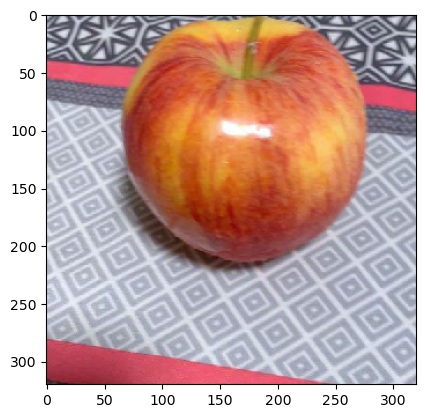

In [42]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [37]:
training_set.class_indices

{'Apple': 0,
 'Banana': 1,
 'Bread': 2,
 'Cashew nut': 3,
 'Chicken leg': 4,
 'Coca Cola': 5,
 'Egg': 6,
 'Grapes': 7,
 'Lemon': 8,
 'Mango': 9,
 'Noodels': 10,
 'Orange': 11,
 'Pasta': 12,
 'Pistachio': 13,
 'Salad dressing': 14,
 'Tea': 15,
 'Water': 16,
 'Watermelon fresh': 17,
 'biryani': 18,
 'burger': 19,
 'butter_chicken': 20,
 'chapati': 21,
 'chicken_tikka': 22,
 'dosa': 23,
 'egg_curry': 24,
 'gulab_jamun': 25,
 'idilli': 26,
 'jalebi': 27,
 'kadala_curry': 28,
 'kerala_puttu': 29,
 'lassi': 30,
 'mysore_pak': 31,
 'naan': 32,
 'pongal': 33,
 'sadhya': 34,
 'sambar': 35,
 'sandwitch': 36,
 'shawarma': 37,
 'unni_appam': 38,
 'vada': 39}

In [ ]:
result[0][0]

**Resnet Model**

In [9]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


94765736/94765736 [==============================] - 1s 0us/step


In [10]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [18]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [19]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 320, 320, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 326, 326, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 160, 160, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [20]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [22]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/kaggle/input/classification-data/food/train',
                                                 target_size = (320, 320),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 7642 images belonging to 40 classes.


In [23]:
test_set = test_datagen.flow_from_directory('/kaggle/input/classification-data/food/test',
                                            target_size = (320, 320),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 983 images belonging to 40 classes.


In [25]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=100,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/100
239/239 [==============================] - 312s 1s/step - loss: 36.0692 - accuracy: 0.2396 - val_loss: 24.1508 - val_accuracy: 0.1811
Epoch 2/100
239/239 [==============================] - 252s 1s/step - loss: 22.8446 - accuracy: 0.2794 - val_loss: 34.9378 - val_accuracy: 0.2380
Epoch 3/100
239/239 [==============================] - 254s 1s/step - loss: 23.7883 - accuracy: 0.3061 - val_loss: 17.4333 - val_accuracy: 0.4201
Epoch 4/100
239/239 [==============================] - 249s 1s/step - loss: 21.5575 - accuracy: 0.3184 - val_loss: 20.0560 - val_accuracy: 0.3896
Epoch 5/100
239/239 [==============================] - 251s 1s/step - loss: 21.4836 - accuracy: 0.3210 - val_loss: 19.4989 - val_accuracy: 0.3876
Epoch 6/100
239/239 [==============================] - 258s 1s/step - loss: 19.4144 - accuracy: 0.3402 - val_loss: 20.8443 - val_accuracy: 0.3988
Epoch 7/100
239/239 [==============================] - 255s 1s/step - loss: 18.8312 - accuracy: 0.3549 - val_loss: 20.8244 -

KeyboardInterrupt: 

In [46]:
import tensorflow 

Resnet v2

In [55]:
resnet152V2 =tensorflow.keras.applications.ResNet152V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


In [61]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [62]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/kaggle/input/classification-data/food/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 7642 images belonging to 40 classes.


In [63]:
test_set = test_datagen.flow_from_directory('/kaggle/input/classification-data/food/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 983 images belonging to 40 classes.


In [56]:
# don't train existing weights
for layer in resnet152V2.layers:
    layer.trainable = False

In [59]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [57]:
# our layers - you can add more if you want
x = Flatten()(resnet152V2.output)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet152V2.input, outputs=prediction)
# view the structure of the model
model.summary()


Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [64]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=35,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/35
239/239 [==============================] - 179s 745ms/step - loss: 12.3805 - accuracy: 0.6312 - val_loss: 11.6225 - val_accuracy: 0.7050
Epoch 2/35
239/239 [==============================] - 168s 703ms/step - loss: 6.7026 - accuracy: 0.7923 - val_loss: 12.7332 - val_accuracy: 0.7172
Epoch 3/35
239/239 [==============================] - 170s 709ms/step - loss: 5.7539 - accuracy: 0.8305 - val_loss: 14.9544 - val_accuracy: 0.7141
Epoch 4/35
239/239 [==============================] - 170s 709ms/step - loss: 5.1819 - accuracy: 0.8563 - val_loss: 14.5720 - val_accuracy: 0.7406
Epoch 5/35
239/239 [==============================] - 168s 705ms/step - loss: 4.4901 - accuracy: 0.8824 - val_loss: 15.0800 - val_accuracy: 0.7182
Epoch 6/35
239/239 [==============================] - 170s 712ms/step - loss: 4.2128 - accuracy: 0.8974 - val_loss: 16.7216 - val_accuracy: 0.7223
Epoch 7/35
239/239 [==============================] - 170s 709ms/step - loss: 3.8244 - accuracy: 0.9084 - val_loss: 1

In [65]:
model.save('resnetv2.h5')

In [66]:
model=load_model('/kaggle/working/resnetv2.h5')

In [75]:
img = image.load_img('/kaggle/input/classification-data/food/val/Apple/071750.jpg', target_size=(224, 224))

    # Preprocessing the image
x=image.img_to_array(img)
    # x = np.true_divide(x, 255)
    ## Scaling
x=x/255
x=np.expand_dims(x, axis=0)
   

    # Be careful how your trained model deals with the input
    # otherwise, it won't make correct prediction!
   # x = preprocess_input(x)
preds = model.predict(x)
preds=np.argmax(preds, axis=1)
preds

1/1 [==============================] - 0s 49ms/step


array([0])

In [71]:
training_set.class_indices

{'Apple': 0,
 'Banana': 1,
 'Bread': 2,
 'Cashew nut': 3,
 'Chicken leg': 4,
 'Coca Cola': 5,
 'Egg': 6,
 'Grapes': 7,
 'Lemon': 8,
 'Mango': 9,
 'Noodels': 10,
 'Orange': 11,
 'Pasta': 12,
 'Pistachio': 13,
 'Salad dressing': 14,
 'Tea': 15,
 'Water': 16,
 'Watermelon fresh': 17,
 'biryani': 18,
 'burger': 19,
 'butter_chicken': 20,
 'chapati': 21,
 'chicken_tikka': 22,
 'dosa': 23,
 'egg_curry': 24,
 'gulab_jamun': 25,
 'idilli': 26,
 'jalebi': 27,
 'kadala_curry': 28,
 'kerala_puttu': 29,
 'lassi': 30,
 'mysore_pak': 31,
 'naan': 32,
 'pongal': 33,
 'sadhya': 34,
 'sambar': 35,
 'sandwitch': 36,
 'shawarma': 37,
 'unni_appam': 38,
 'vada': 39}